In [1]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
mat = scipy.io.loadmat('Consensus_Connectomes.mat',simplify_cells=True,squeeze_me=True,chars_as_strings=True)
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'LauConsensus'])


In [3]:
print(mat['LauConsensus'].keys())

dict_keys(['Matrices', 'Readme'])


In [4]:
print(mat['LauConsensus']['Readme'])

['1 - weighted adj mat' '2 - fiber length mat' '3 - fc mat'
 '4 - coordinates' '5{1} - roi name' '5{2} - short name' '5{3} - rsn name'
 '5{4} - hemisphere']


In [5]:
print(mat['LauConsensus']['Matrices'].shape)

(5, 5)


In [6]:
print(mat['LauConsensus']['Matrices'][2].shape)

(5,)


In [7]:
print(mat['LauConsensus']['Matrices'][2][0].shape) # SC
print(mat['LauConsensus']['Matrices'][2][1].shape) # delays
print(mat['LauConsensus']['Matrices'][2][2].shape) # FC

(219, 219)
(219, 219)
(219, 219)


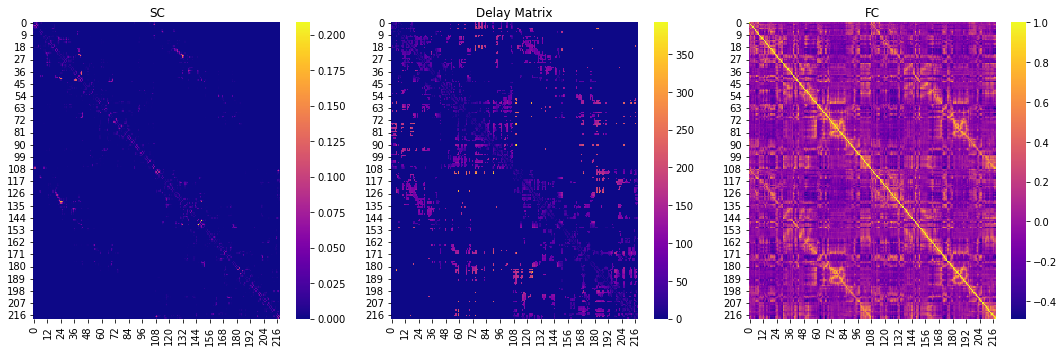

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(mat['LauConsensus']['Matrices'][2][0], ax=axes[0], cmap="plasma")
axes[0].set_title("SC")

sns.heatmap(mat['LauConsensus']['Matrices'][2][1], ax=axes[1], cmap="plasma")
axes[1].set_title("Delay Matrix")

sns.heatmap(mat['LauConsensus']['Matrices'][2][2], ax=axes[2], cmap="plasma")
axes[2].set_title("FC")

plt.tight_layout()
plt.show()

In [9]:
model = WCModel(Cmat = mat['LauConsensus']['Matrices'][2][0], Dmat = mat['LauConsensus']['Matrices'][2][1])

In [10]:
model.params['exc_ext'] = 0.65

model.params['signalV'] = 0
model.params['duration'] = 20 * 1000 
model.params['sigma_ou'] = 0.14
model.params['K_gl'] = 3.15


model.run(chunkwise=True)

(0.0, 200.0)

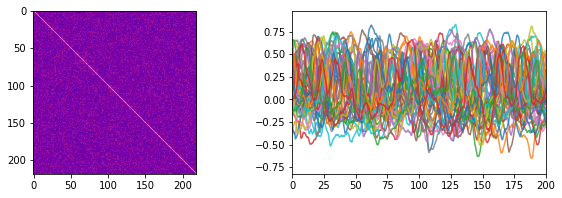

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(model.exc[:, -10000:]))
axs[1].plot(model.t, model.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [12]:
func.fc(model.exc[:, -10000:]).shape

(219, 219)

In [13]:
score = func.matrix_correlation(func.fc(model.exc[:, -10000:]), mat['LauConsensus']['Matrices'][2][2])
print("Mean FC/FC correlation: {:.2f}".format(score))

Mean FC/FC correlation: 0.01


## Looping through parameters

In [ ]:
max_corr = float('-inf')
max_params = {}
for exc_ext in np.arange(0.0, 1.0, 0.2):
    for signalV in np.arange(0.0, 1.0, 0.2):
        for sigma_ou in np.arange(0.0, 1.0, 0.2):
            for K_gl in np.arange(0.0, 5.0, 0.5):
                model.params['exc_ext'] = exc_ext
                model.params['signalV'] = signalV
                model.params['duration'] = 20 * 1000
                model.params['sigma_ou'] = sigma_ou
                model.params['K_gl'] = K_gl
                model.run(chunkwise=True)
                
                score = func.matrix_correlation(func.fc(model.exc[:, -10000:]), mat['LauConsensus']['Matrices'][2][2])
                print("current FC/FC correlation: {:.2f}".format(score))
                if score > max_corr:
                    max_corr = score
                    max_params['exc_ext'] = exc_ext
                    max_params['signalV'] = signalV
                    max_params['duration'] = 20 * 1000
                    max_params['sigma_ou'] = sigma_ou
                    max_params['K_gl'] = K_gl
                    print("Max found, max: {0}, params: {1}".format(max_corr, max_params))

/home/vanilla_skies/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/vanilla_skies/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


current FC/FC correlation: 0.01
Max found, max: 0.012243138973955008, params: {'exc_ext': 0.0, 'signalV': 0.0, 'duration': 20000, 'sigma_ou': 0.0, 'K_gl': 0.0}
current FC/FC correlation: 0.00
current FC/FC correlation: 0.00
current FC/FC correlation: 0.05
Max found, max: 0.04679743129711301, params: {'exc_ext': 0.0, 'signalV': 0.0, 'duration': 20000, 'sigma_ou': 0.0, 'K_gl': 1.5}
current FC/FC correlation: -0.00
current FC/FC correlation: 0.00
current FC/FC correlation: -0.01
current FC/FC correlation: 0.01
current FC/FC correlation: 0.01
current FC/FC correlation: 0.00
current FC/FC correlation: -0.01
current FC/FC correlation: 0.01
current FC/FC correlation: -0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.01
current FC/FC correlation: -0.00
current FC/FC correlation: 0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.00
current FC/FC correlation: -0.00
current FC/FC correlation: 0.00
current FC/FC correlation: -0.00
current FC/FC correlation: 0.00
cu

current FC/FC correlation: 0.00
current FC/FC correlation: -0.00
current FC/FC correlation: 0.01
current FC/FC correlation: 0.00
current FC/FC correlation: -0.00
current FC/FC correlation: -0.00
current FC/FC correlation: -0.00
current FC/FC correlation: 0.00
current FC/FC correlation: -0.01
current FC/FC correlation: -0.01
current FC/FC correlation: -0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.01
current FC/FC correlation: -0.01
current FC/FC correlation: -0.01
current FC/FC correlation: 0.00
current FC/FC correlation: -0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.01
current FC/FC correlation: 0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.01
current FC/FC correlation: -0.01
current FC/FC correlation: 0.00
current FC/FC correlation: 0.00
current FC/FC correlation: -0.01
current FC/FC correlation: -0.01
current FC/FC correlation: -0.00
current FC/FC correlation: -0.00
current FC/FC correlation: 0.01
current FC/FC correlation

Max found, max: {0}, params: {1} 0.01919055916674434 {'exc_ext': 0.0, 'signalV': 0.1, 'duration': 20000, 'sigma_ou': 0.9, 'K_gl': 1.2000000000000002}

Max found, max: 0.04679743129711301, params: {'exc_ext': 0.0, 'signalV': 0.0, 'duration': 20000, 'sigma_ou': 0.0, 'K_gl': 1.5}